# MALCOM Lab Session 1

# Neural Network Implementation and Training
In this lab session, we will develop a simple neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [ ]:
# Setup

import numpy as np
import matplotlib.pyplot as plt

from malcom.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `malcom/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. We will start with initializing toy data and a toy model, which we will use to further develop the neural network implementation.

In [ ]:
# We create a small network and some toy data to check our implementations.
# Random seed is set for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X)
print(y)


[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
[0 1 2 2 1]


# Forward pass: compute scores
Open the file `malcom/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [ ]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('Correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small, less than 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and the regularization loss.

In [ ]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# This should be very small, less than 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. To check that the forward pass has been implemented correctly, you can debug your backward pass using a numeric gradient check:

In [ ]:
from malcom.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# the analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Neural Network Training
To train the neural network, we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. 

You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on some toy data. The expected training loss should be less than 0.02.

Final training loss:  0.0019048071352021003


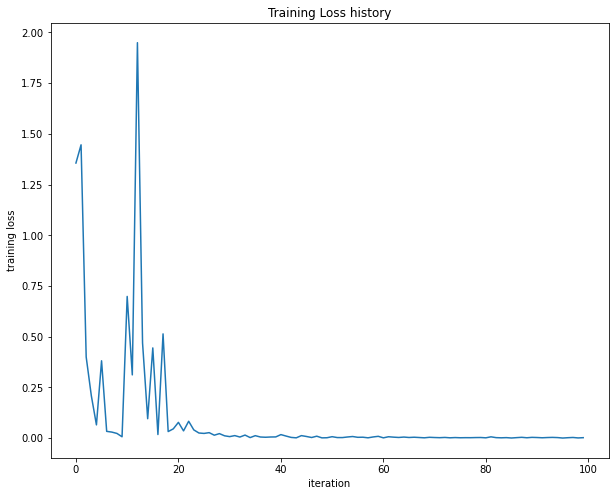

In [ ]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6, batch_size=3,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# CIFAR-10 Data Loading
We will now train the implemented neural network in a real dataset, the widely used CIFAR-10.
You can download this dataset at: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Then, you can put it in the folder malcom/datasets (or anywhere else you want, but then you will need to change the path in the below code).

In [ ]:
from malcom.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    This will allows us to load the CIFAR-10 dataset and perform preprocessing to prepare
    it for the two-layer neural net classifier.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'malcom/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Network Training
To train our network we will use (as before) SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302950
iteration 100 / 1000: loss 2.302396
iteration 200 / 1000: loss 2.297389
iteration 300 / 1000: loss 2.261707
iteration 400 / 1000: loss 2.193734
iteration 500 / 1000: loss 2.137481
iteration 600 / 1000: loss 2.111655
iteration 700 / 1000: loss 2.037897
iteration 800 / 1000: loss 1.975678
iteration 900 / 1000: loss 1.917548
Validation accuracy:  0.277


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training Debugging
With the default parameters set above, the validation accuracy should be around 0.29 on the validation set. This is a relatively poor performance.

One strategy to understand where is the problem is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. 

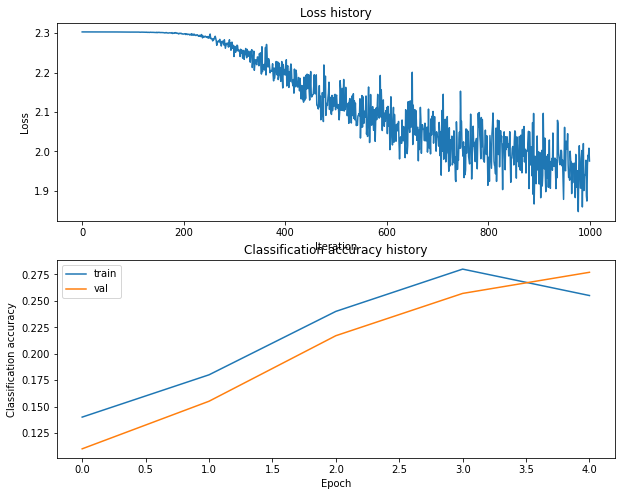

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

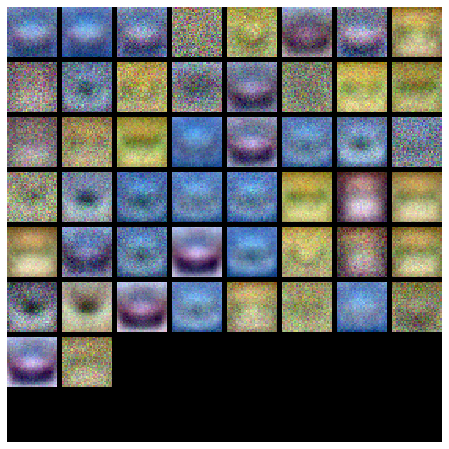

In [ ]:
from malcom.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Hyperparameters tuning

**What's wrong?**. Looking at the visualizations above, we observe that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how these hyperparameters affect the final performance is an important task in Neural Networks - one would need a lot of practice and experience to get this skill. 
Here, we will experiment with different values of the various hyperparameters, including hidden layer size, learning rate, number of training epochs, and regularization strength. 
You might also consider tuning the learning rate decay (but even without this, you should be able to get good performance).

**Target accuracy**. The target classification accuracy to be achieved should be greater than 48% on the validation set. 

**Experiment**: The goal here is to get the best result possible on CIFAR-10. The best performance, with a more elaborated network, should be around 52%. 
Students with prior ML background could also implement various techniques to improve performance (e.g. PCA to reduce dimensionality, dropout, adding features to the solver, etc.). This is not needed though for getting good performance, unless we want to really approach the reference accuracy value.

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit {The comments written below in the code}}$ 

iteration 0 / 3000: loss 2.304064
iteration 100 / 3000: loss 1.940589
iteration 200 / 3000: loss 1.758407
iteration 300 / 3000: loss 1.528718
iteration 400 / 3000: loss 1.658767
iteration 500 / 3000: loss 1.591872
iteration 600 / 3000: loss 1.534426
iteration 700 / 3000: loss 1.622569
iteration 800 / 3000: loss 1.483613
iteration 900 / 3000: loss 1.499283
iteration 1000 / 3000: loss 1.450414
iteration 1100 / 3000: loss 1.402754
iteration 1200 / 3000: loss 1.378778
iteration 1300 / 3000: loss 1.449086
iteration 1400 / 3000: loss 1.424876
iteration 1500 / 3000: loss 1.386666
iteration 1600 / 3000: loss 1.434288
iteration 1700 / 3000: loss 1.469049
iteration 1800 / 3000: loss 1.518609
iteration 1900 / 3000: loss 1.302256
iteration 2000 / 3000: loss 1.327521
iteration 2100 / 3000: loss 1.320773
iteration 2200 / 3000: loss 1.459337
iteration 2300 / 3000: loss 1.387538
iteration 2400 / 3000: loss 1.324747
iteration 2500 / 3000: loss 1.310066
iteration 2600 / 3000: loss 1.411903
iteration 270

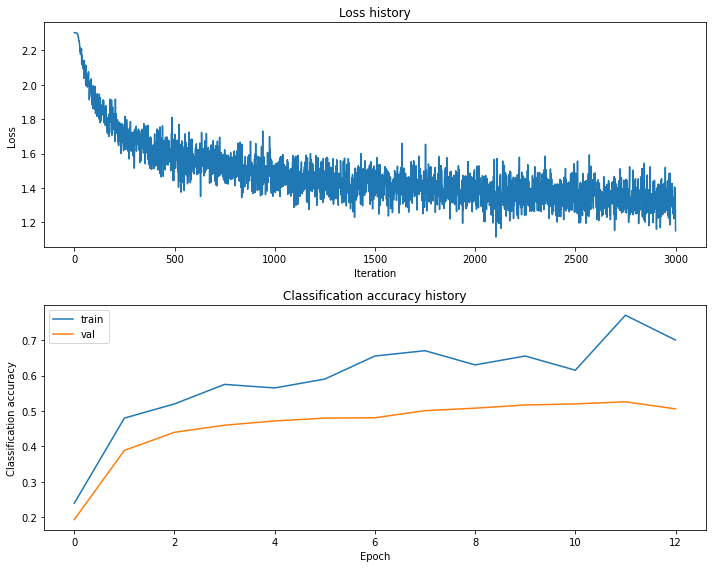

In [ ]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
#################################################################################
# *****START OF YOUR CODE*****


# 1st comment ##
# 32 * 32 are the height and the weight of the image, and 3 is the number of input
#channels 


input_size = 32 * 32 * 3
hidden_size = 200
# 2nd comment 
 # increased number of neurons to increase the capacity of the network
# Here we have 10 classes of output  Y 


num_classes = 10

#3rd comment 
# we used neural network composed of 2 hiddn layers with 200 hidden units in both

best_net = TwoLayerNet(input_size, hidden_size, num_classes)

#4th comment 


# We trained our model  using the neural_net.py.train with the train and the validation sets
# with regularization , such that reg=0.25
# The params W1 and W2 , and the biases b1 and b2 are affeted 
# by the size of the input and the hidden units , in our case , we 
#increased  both of them which means increasing the complexity 
#of the network( good point in our case since it leads to  better accuarcy )

# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

#5 th comment
# increased number of iterations and increased the learning rate
#to have better convergenceand ensure that sgd algorithm won't stop early

#6th comment 
# Predict on the validation set
# Here we compared the true labels y_val and the predicted ones which are esimated via the 
#predict(X) and calculated the mean of that , to have the accuracy 


val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# *****END OF YOUR CODE*****

In [ ]:
from re import L
from sklearn.model_selection import GridSearchCV

input_size = 32 * 32 * 3
hidden_size = 200 # increased number of neurons to increase the capacity of the network
# Here we have 10 classes of output  Y 
num_classes = 10
# we used neural network composed of 2 hiddn layers with 200 hidden units in both
best_net = TwoLayerNet(input_size, hidden_size, num_classes)
L=[0.01,0.02,0.03,0.04,0.05]
for i in L:
     stats = best_net.train(X_train, y_train, X_val, y_val,
     num_iters=3000, batch_size=200,
     learning_rate=1e-3, learning_rate_decay=0.95,
            reg=i, verbose=True) 
     val_acc = (best_net.predict(X_val) == y_val).mean()
     print('Validation accuracy: ', val_acc)
   
  



iteration 0 / 3000: loss 2.302608
iteration 100 / 3000: loss 1.924680
iteration 200 / 3000: loss 1.740526
iteration 300 / 3000: loss 1.705121
iteration 400 / 3000: loss 1.516894
iteration 500 / 3000: loss 1.512366
iteration 600 / 3000: loss 1.554086
iteration 700 / 3000: loss 1.410279
iteration 800 / 3000: loss 1.501541
iteration 900 / 3000: loss 1.432279
iteration 1000 / 3000: loss 1.425449
iteration 1100 / 3000: loss 1.184035
iteration 1200 / 3000: loss 1.373574
iteration 1300 / 3000: loss 1.428230
iteration 1400 / 3000: loss 1.226529
iteration 1500 / 3000: loss 1.364300
iteration 1600 / 3000: loss 1.297801
iteration 1700 / 3000: loss 1.257774
iteration 1800 / 3000: loss 1.393219
iteration 1900 / 3000: loss 1.061624
iteration 2000 / 3000: loss 1.197785
iteration 2100 / 3000: loss 1.396467
iteration 2200 / 3000: loss 1.047896
iteration 2300 / 3000: loss 1.234576
iteration 2400 / 3000: loss 1.201031
iteration 2500 / 3000: loss 1.159748
iteration 2600 / 3000: loss 1.215586
iteration 270

iteration 0 / 3000: loss 0.623577
iteration 100 / 3000: loss 1.252469
iteration 200 / 3000: loss 0.977364
iteration 300 / 3000: loss 0.903201
iteration 400 / 3000: loss 0.993354
iteration 500 / 3000: loss 0.746281
iteration 600 / 3000: loss 0.659861
iteration 700 / 3000: loss 0.716327
iteration 800 / 3000: loss 0.781257
iteration 900 / 3000: loss 0.594651
iteration 1000 / 3000: loss 0.770059
iteration 1100 / 3000: loss 0.742298
iteration 1200 / 3000: loss 0.785374
iteration 1300 / 3000: loss 0.678105
iteration 1400 / 3000: loss 0.694713
iteration 1500 / 3000: loss 0.650158
iteration 1600 / 3000: loss 0.738479
iteration 1700 / 3000: loss 0.773911
iteration 1800 / 3000: loss 0.692603
iteration 1900 / 3000: loss 0.694055
iteration 2000 / 3000: loss 0.603322
iteration 2100 / 3000: loss 0.649022
iteration 2200 / 3000: loss 0.551712
iteration 2300 / 3000: loss 0.649576
iteration 2400 / 3000: loss 0.506088
iteration 2500 / 3000: loss 0.539097
iteration 2600 / 3000: loss 0.634475
iteration 270

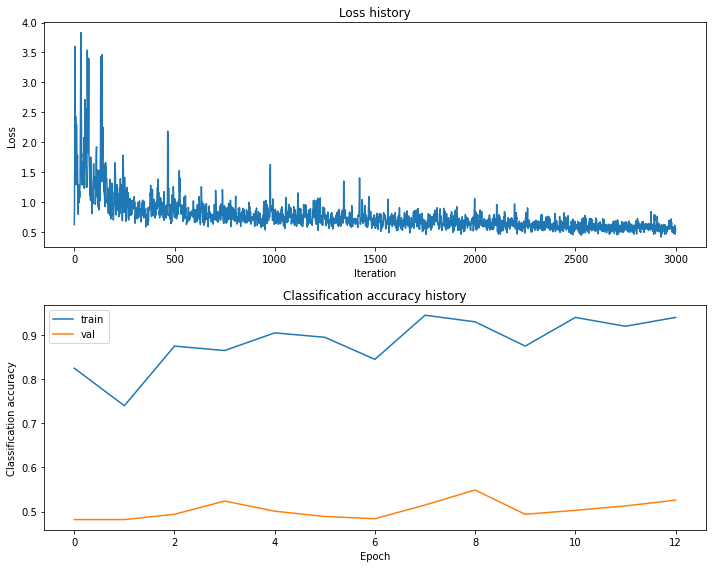

In [ ]:
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.02, verbose=True)

# increased number of iterations and increased the learning rate
#to have better convergenceand ensure that sgd algorithm won't stop early

# Predict on the validation set
# Here we compared the true labels y_val and the predicted ones which are esimated via the 
#predict(X) and calculated the mean of that , to have the accuracy 
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

iteration 0 / 3000: loss 1.416570
iteration 100 / 3000: loss 1.577994
iteration 200 / 3000: loss 1.385387
iteration 300 / 3000: loss 1.464591
iteration 400 / 3000: loss 1.528493
iteration 500 / 3000: loss 1.343714
iteration 600 / 3000: loss 1.355435
iteration 700 / 3000: loss 1.509830
iteration 800 / 3000: loss 1.485783
iteration 900 / 3000: loss 1.536472
iteration 1000 / 3000: loss 1.385651
iteration 1100 / 3000: loss 1.510374
iteration 1200 / 3000: loss 1.518224
iteration 1300 / 3000: loss 1.392485
iteration 1400 / 3000: loss 1.419101
iteration 1500 / 3000: loss 1.573270
iteration 1600 / 3000: loss 1.415190
iteration 1700 / 3000: loss 1.460495
iteration 1800 / 3000: loss 1.395275
iteration 1900 / 3000: loss 1.429557
iteration 2000 / 3000: loss 1.328358
iteration 2100 / 3000: loss 1.453806
iteration 2200 / 3000: loss 1.417553
iteration 2300 / 3000: loss 1.526663
iteration 2400 / 3000: loss 1.385773
iteration 2500 / 3000: loss 1.363580
iteration 2600 / 3000: loss 1.527571
iteration 270

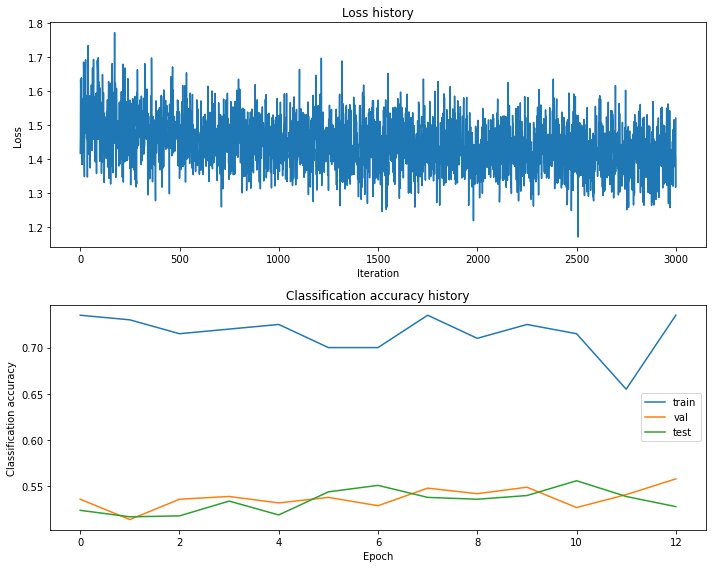

In [ ]:
stats = best_net.train(X_train, y_train, X_val, y_val,X_test,y_test,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# increased number of iterations and increased the learning rate
#to have better convergenceand ensure that sgd algorithm won't stop early

# Predict on the validation set
# Here we compared the true labels y_val and the predicted ones which are esimated via the 
#predict(X) and calculated the mean of that , to have the accuracy 
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

test_acc = (best_net.predict(X_test) == y_test).mean()
print('Testing accuracy: ', test_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.plot(stats['test_acc_history'], label='test')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

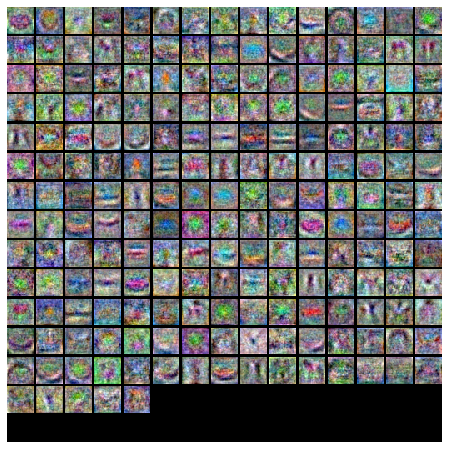

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

In the previous examples we increased the regularization term and we saw that the accuracy increased but also there is a risk to overfit ( We tried may values and we kept the graph corresponding to reg=0.5 because the plots are more clear and doesn't sshow any aspect of overfitting). When we decreased the regularization we saw that the accuracy decreased and the loss increased.

# Run on the test set
When you are done experimenting, you should evaluate your final trained neural network on the test set. We expect to get accuracy above 48%.

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.541


In [ ]:
train_acc = (best_net.predict(X_train) == y_train).mean()
print('Training accuracy: ', train_acc)

Training accuracy:  0.5951632653061224


**Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. Which of the below (possibly multiple) ways can decrease this gap?

1. Increase the regularization strength.
2. Train on a larger dataset.
3. Add more hidden units.
4. None of the above.

$\color{blue}{\textit{Your Answer - Please Explain}}$ 

In [ ]:
from malcom.data_utils import load_CIFAR10

def get_CIFAR10_aumented_data(num_training=49000, num_validation=1000, num_test=1000):
    """
   This will allows us to load the CIFAR-10 dataset and perform preprocessing to prepare
   it for the two-layer neural net classifier.  
   """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'malcom/datasets/cifar-10-batches-py'
   
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train_new, y_train_new
       del X_test_new, y_test_new
       print('Clear previously loaded data.')
    except:
       pass
 
    X_train_new, y_train_new, X_test_new, y_test_new = load_CIFAR10(cifar10_dir)
       
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val_new = X_train_new[mask]
    y_val_new = y_train_new[mask]
    mask = list(range(num_training))
    X_train_new = X_train_new[mask]
    y_train_new = y_train_new[mask]
    mask = list(range(num_test))
    X_test_new = X_test_new[mask]
    y_test_new = y_test_new[mask]
   
    # Data augmentation ( more data ( flipping the images of data sets))
    X_train_new = np.concatenate((X_train_new, X_train_new[:,:,::-1,:]), axis=0) # add flipped images
    y_train_new = np.concatenate((y_train_new, y_train_new), axis=0)

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train_new, axis=0)
    X_train_new -= mean_image
    X_val_new -= mean_image
    X_test_new -= mean_image
 
    # Reshape data to rows
    X_train_new = X_train_new.reshape(int(num_training * 2), -1) # We doubled the training data set
    X_val_new = X_val_new.reshape(num_validation, -1)
    X_test_new = X_test_new.reshape(num_test, -1)
    
    # Noise injection
    X_train_new_noise = X_train_new + np.random.normal(0,1,size=X_train_new.shape)
    
    return X_train_new, y_train_new, X_val_new, y_val_new, X_test_new, y_test_new, X_train_new_noise
 
 
# Invoke the above function to get our data.
X_train_new, y_train_new, X_val_new, y_val_new, X_test_new, y_test_new, X_train_new_noise = get_CIFAR10_aumented_data(num_training=49000, num_validation=1000, num_test=1000)
print('Train data shape: ', X_train_new.shape)
print('Train labels shape: ', y_train_new.shape)
print('Validation data shape: ', X_val_new.shape)
print('Validation labels shape: ', y_val_new.shape)
print('Test data shape: ', X_test_new.shape)
print('Test labels shape: ', y_test_new.shape)

Train data shape:  (98000, 3072)
Train labels shape:  (98000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


iteration 0 / 3000: loss 2.304122
iteration 100 / 3000: loss 1.967597
iteration 200 / 3000: loss 1.726143
iteration 300 / 3000: loss 1.642548
iteration 400 / 3000: loss 1.572358
iteration 500 / 3000: loss 1.495230
iteration 600 / 3000: loss 1.538897
iteration 700 / 3000: loss 1.550721
iteration 800 / 3000: loss 1.506897
iteration 900 / 3000: loss 1.737882
iteration 1000 / 3000: loss 1.418297
iteration 1100 / 3000: loss 1.452457
iteration 1200 / 3000: loss 1.524984
iteration 1300 / 3000: loss 1.489548
iteration 1400 / 3000: loss 1.454457
iteration 1500 / 3000: loss 1.482754
iteration 1600 / 3000: loss 1.465794
iteration 1700 / 3000: loss 1.457023
iteration 1800 / 3000: loss 1.307773
iteration 1900 / 3000: loss 1.494769
iteration 2000 / 3000: loss 1.454169
iteration 2100 / 3000: loss 1.387162
iteration 2200 / 3000: loss 1.261572
iteration 2300 / 3000: loss 1.433468
iteration 2400 / 3000: loss 1.326304
iteration 2500 / 3000: loss 1.469037
iteration 2600 / 3000: loss 1.373455
iteration 270

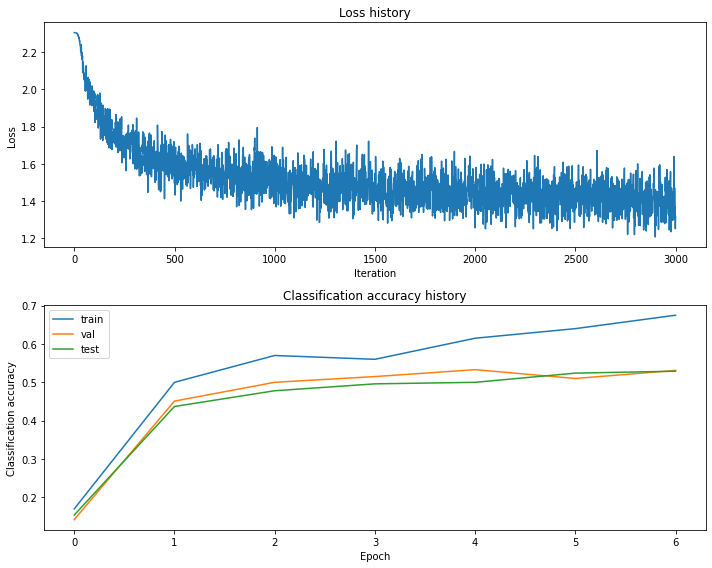

In [ ]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
#################################################################################
# *****START OF YOUR CODE*****
# 32 * 32 are the height and the weight of the image, and 3 is the number of input
#channels 
input_size = 32 * 32 * 3
hidden_size = 200 # increased number of neurons to increase the capacity of the network
# Here we have 10 classes of output  Y 
num_classes = 10
# we used neural network composed of 2 hiddn layers with 200 hidden units in both
best_net = TwoLayerNet(input_size, hidden_size, num_classes)
# We trained our model  using the neural_net.py.train with the train and the validation sets
# with regularization , such that reg=0.25
# The params W1 and W2 , and the biases b1 and b2 are affeted 
# by the size of the input and the hidden units , in our case , we 
#increased  both of them which means increasing the complexity 
#of the network( good point in our case since it leads to  better accuarcy )
# Train the network
stats = best_net.train(X_train_new, y_train_new, X_val_new, y_val_new,X_test_new,y_test_new,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# increased number of iterations and increased the learning rate
#to have better convergenceand ensure that sgd algorithm won't stop early

# Predict on the validation set
# Here we compared the true labels y_val and the predicted ones which are esimated via the 
#predict(X) and calculated the mean of that , to have the accuracy 
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.plot(stats['test_acc_history'], label='test')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# *****END OF YOUR CODE*****

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,X_test,y_test,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.303376
iteration 100 / 1000: loss 2.302354
iteration 200 / 1000: loss 2.295128
iteration 300 / 1000: loss 2.256108
iteration 400 / 1000: loss 2.172309
iteration 500 / 1000: loss 2.074677
iteration 600 / 1000: loss 2.081131
iteration 700 / 1000: loss 1.934290
iteration 800 / 1000: loss 1.983242
iteration 900 / 1000: loss 1.877741
Validation accuracy:  0.3


iteration 0 / 3000: loss 2.305668
iteration 100 / 3000: loss 1.867682
iteration 200 / 3000: loss 1.934688
iteration 300 / 3000: loss 1.624623
iteration 400 / 3000: loss 1.621832
iteration 500 / 3000: loss 1.463007
iteration 600 / 3000: loss 1.577899
iteration 700 / 3000: loss 1.523126
iteration 800 / 3000: loss 1.504000
iteration 900 / 3000: loss 1.455119
iteration 1000 / 3000: loss 1.548506
iteration 1100 / 3000: loss 1.473456
iteration 1200 / 3000: loss 1.396243
iteration 1300 / 3000: loss 1.371973
iteration 1400 / 3000: loss 1.341033
iteration 1500 / 3000: loss 1.424004
iteration 1600 / 3000: loss 1.171400
iteration 1700 / 3000: loss 1.510174
iteration 1800 / 3000: loss 1.354576
iteration 1900 / 3000: loss 1.340283
iteration 2000 / 3000: loss 1.327581
iteration 2100 / 3000: loss 1.589083
iteration 2200 / 3000: loss 1.305931
iteration 2300 / 3000: loss 1.312638
iteration 2400 / 3000: loss 1.357715
iteration 2500 / 3000: loss 1.457079
iteration 2600 / 3000: loss 1.310083
iteration 270

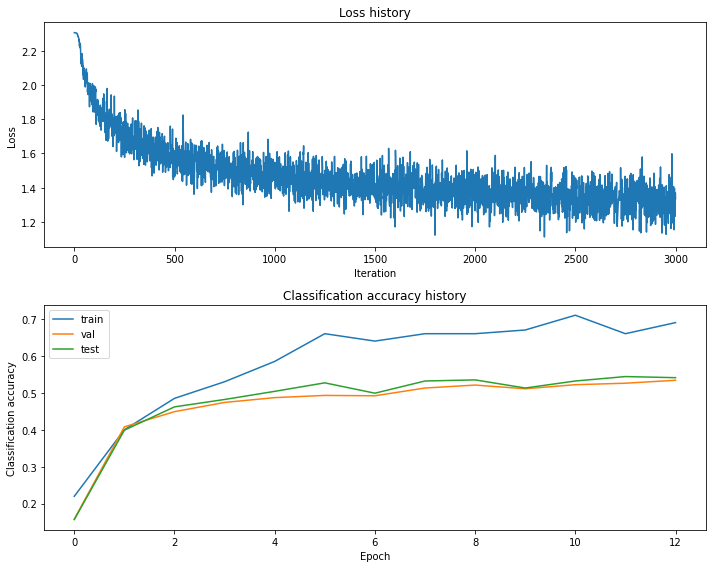

In [ ]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
#################################################################################
# *****START OF YOUR CODE*****
# 32 * 32 are the height and the weight of the image, and 3 is the number of input
#channels 
input_size = 32 * 32 * 3
hidden_size = 400 # increased number of neurons to increase the capacity of the network
# Here we have 10 classes of output  Y 
num_classes = 10
# we used neural network composed of 2 hiddn layers with 200 hidden units in both
best_net = TwoLayerNet(input_size, hidden_size, num_classes)
# We trained our model  using the neural_net.py.train with the train and the validation sets
# with regularization , such that reg=0.25
# The params W1 and W2 , and the biases b1 and b2 are affeted 
# by the size of the input and the hidden units , in our case , we 
#increased  both of them which means increasing the complexity 
#of the network( good point in our case since it leads to  better accuarcy )
# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,X_test,y_test,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# increased number of iterations and increased the learning rate
#to have better convergenceand ensure that sgd algorithm won't stop early

# Predict on the validation set
# Here we compared the true labels y_val and the predicted ones which are esimated via the 
#predict(X) and calculated the mean of that , to have the accuracy 
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.plot(stats['test_acc_history'], label='test')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# *****END OF YOUR CODE*****

1. When we regularize , we are generalizing which means the testing eror will decrease and so it will lead to better  test accuarcy, for example by increasing the regularization term in the cell 34 to 0.5 the loss decreased and the accuracy increased to 0.546.
2. Training on larger dataset will lead to overfitting , that means the gap will increase and not the opposite. To verify this let's increase the size of the dataset using the data augmentation technique.
3. Increasing the number of hidden units will decrease the train error  = better train accuracy but bad generalization = test error will increase  so this is why we should use regularization in addition to parametrs tuning to avoid that 
